本案例使用电信用户的通信行为数据集，进行用户信用分群和分析。由于是没有标注的训练样本，使用降维和聚类等无监督方法将用户进行分群。<br>
然后对不同群体数据进行人工分析，确定群体的信用行为特点。

## step1: 数据读取

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
X = pd.read_csv('data/telecom.csv',encoding='utf-8')
print(X.shape)
X.head()

(30000, 7)


,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数
0,27.0,389.0,140.198242,390.0,14.325000,0.0,0.0
1,29.0,159.0,0.000000,5.0,0.000000,5.0,1.0
2,28.0,389.0,0.000000,0.0,0.000000,0.0,0.0
3,20.0,389.0,0.000000,0.0,57.097222,0.0,0.0
4,59.0,159.0,0.000000,4.0,0.000000,0.0,0.0


## step 2 : 数据标准化

In [3]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled[0:5]

array([[-0.32484896,  1.63037135, -0.14052452,  2.08138717, -0.5953273 ,
        -0.2199407 , -0.31623138],
       [-0.24388972, -0.29646995, -0.46276181, -0.68654465, -0.62960238,
        -0.18990475,  0.39196072],
       [-0.28436934,  1.63037135, -0.46276181, -0.72249182, -0.62960238,
        -0.2199407 , -0.31623138],
       [-0.6082063 ,  1.63037135, -0.46276181, -0.72249182, -0.49298724,
        -0.2199407 , -0.31623138],
       [ 0.97049891, -0.29646995, -0.46276181, -0.69373409, -0.62960238,
        -0.2199407 , -0.31623138]])

## step 3: 进行PCA数据降维

In [4]:
from sklearn.decomposition import PCA

#生成PCA实例
pca = PCA(n_components=3)
#进行PCA降维
X_pca = pca.fit_transform(X_scaled)
#生成降维后的dataframe
X_pca_frame = pd.DataFrame(X_pca,columns=['pca_1','pca_2','pca_3'])
X_pca_frame.head()

,pca_1,pca_2,pca_3
0,1.549988,-0.211833,-1.038576
1,-1.034264,0.257341,-0.385973
2,-0.244564,-0.431907,-1.222455
3,-0.151285,-0.400462,-1.430211
4,-1.163608,-0.439145,0.526530


In [5]:
#查看这三个维度坐标轴（主成分）与原始的7个维度坐标轴之间的关系：
pd.DataFrame(pca.components_,columns = X.columns,index =['pca_1','pca_2','pca_3'])

,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数
pca_1,-0.106231,0.416307,0.541932,0.570941,0.430969,0.099574,-0.009541
pca_2,-0.151105,-0.093391,-0.057296,0.084457,-0.128013,0.677448,0.694771
pca_3,0.814896,-0.375968,0.034052,0.068408,0.410924,0.095135,0.104136


## step 4: K-means 聚类

### 训练简单模型

In [6]:
from sklearn.cluster import KMeans

#KMeans算法实例化，将其设置为K=10
est = KMeans(n_clusters=10)

#作用到降维后的数据上
est.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
#取出聚类后的标签
kmeans_clustering_labels = pd.DataFrame(est.labels_,columns=['cluster'])

#生成有聚类后dataframe
X_pca_frame = pd.concat([X_pca_frame,kmeans_clustering_labels],axis =1)

X_pca_frame.head()

,pca_1,pca_2,pca_3,cluster
0,1.549988,-0.211833,-1.038576,2
1,-1.034264,0.257341,-0.385973,0
2,-0.244564,-0.431907,-1.222455,4
3,-0.151285,-0.400462,-1.430211,4
4,-1.163608,-0.439145,0.526530,9


### 对不同的k值进行计算，筛选最优的k值

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics


calinski_harabaz_score with k=2 is 3407.50124972
calinski_harabaz_score with k=3 is 2748.05780001
calinski_harabaz_score with k=4 is 5022.47175241
calinski_harabaz_score with k=5 is 4456.76540543
calinski_harabaz_score with k=6 is 2948.96211991
calinski_harabaz_score with k=7 is 4891.93078587
calinski_harabaz_score with k=8 is 4286.07061391
calinski_harabaz_score with k=9 is 43434.6693977
calinski_harabaz_score with k=10 is 54600.4910359
calinski_harabaz_score with k=11 is 15385.5000285
calinski_harabaz_score with k=12 is 6215.94606742
calinski_harabaz_score with k=13 is 5611.65516489


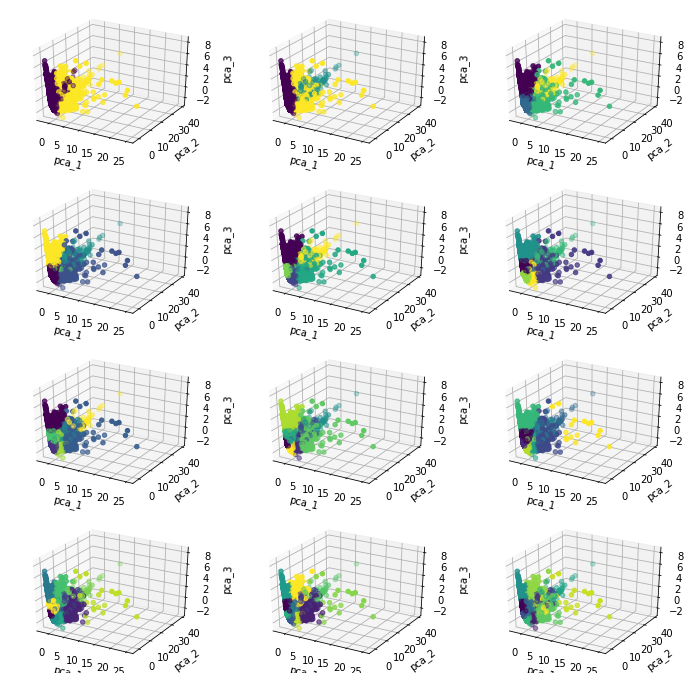

In [73]:
#KMeans算法实例化，将其设置为K=10

d = {}
fig_reduced_data = plt.figure(figsize= (12,12))
for k in range(2,14):
    est = KMeans(n_clusters=k,random_state=111)

    #作用到降维后的数据上
    y_pred = est.fit_predict(X_pca)
    
    #评估不同k值聚类算法效果
    score = metrics.calinski_harabaz_score(X_pca_frame,y_pred)

    d.update({k:calinski_harabaz_score})
    print('calinski_harabaz_score with k={0} is {1}'.format(k,score))


    #生成三维图形，每个样本点的坐标分别是三个主成分的值  
    ax= plt.subplot(4,3,k-1,projection = '3d')
#     ax = plt.gca()
#     ax.title("k=")
    ax.scatter(X_pca_frame.pca_1,X_pca_frame.pca_2,X_pca_frame.pca_3,c= y_pred)
    ax.set_xlabel('pca_1')
    ax.set_ylabel('pca_2')
    ax.set_zlabel('pca_3')
#     ax.text3D(.99, .01,0.01,('k=%d, score: %.2f' % (k,score)),
#              transform=plt.gca().transAxes, size=10,horizontalalignment='right')


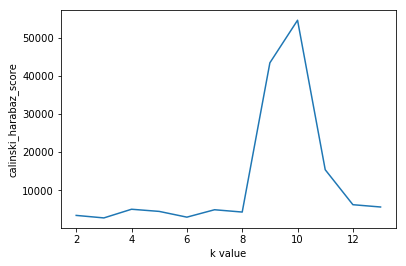

In [62]:
#绘制不同k值对应的score，找到最优的k值
x = []
y = []
for k,score in d.iteritems():
    x.append(k)
    y.append(score)   

plt.plot(x,y)
plt.xlabel('k value')
plt.ylabel('calinski_harabaz_score')

### 步骤5	样本筛选

In [8]:
X.index = X_pca_frame.index
#合并原数据和三个主成分的数据
X_full = pd.concat([X,X_pca_frame],axis = 1)
X_full.head()

,入网时间,套餐价格,每月流量,每月话费,每月通话时长,欠费金额,欠费月份数,pca_1,pca_2,pca_3,cluster
0,27.0,389.0,140.198242,390.0,14.325000,0.0,0.0,1.549988,-0.211833,-1.038576,2
1,29.0,159.0,0.000000,5.0,0.000000,5.0,1.0,-1.034264,0.257341,-0.385973,0
2,28.0,389.0,0.000000,0.0,0.000000,0.0,0.0,-0.244564,-0.431907,-1.222455,4
3,20.0,389.0,0.000000,0.0,57.097222,0.0,0.0,-0.151285,-0.400462,-1.430211,4
4,59.0,159.0,0.000000,4.0,0.000000,0.0,0.0,-1.163608,-0.439145,0.526530,9


In [9]:
#按每个聚类分组
grouped = X_full.groupby('cluster')
result_data  = pd.DataFrame()
#对分组做循环，分别对每组进行去除异常值处理
for name,group in grouped:
    #每组去除异常值前的个数
    print('Group:{0}, Samples before:{1}'.format(name,group['pca_1'].count()))
    desp = group[['pca_1','pca_2','pca_3']].describe()
    for att in ['pca_1','pca_2','pca_3']:
        lower25 =desp.loc['25%',att]
        upper75 =desp.loc['75%',att]
        IQR = upper75 - lower25
        min_value = lower25-1.5*IQR
        max_value = upper75 +1.5*IQR
        #使用统计中的1.5*IQR法则，删除每个聚类中的噪音和异常点
        group = group[(group[att]>min_value)&(group[att]<max_value)]
    result_data = pd.concat([result_data,group],axis = 0)
    #每组去除异常值前的个数
    print('Group:{0}, Samples after:{1}'.format(name,group['pca_1'].count()))
print('Remain sample:',result_data['pca_1'].count())

Group:0, Samples before:11120
Group:0, Samples after:9521
Group:1, Samples before:37
Group:1, Samples after:35
Group:2, Samples before:2842
Group:2, Samples after:2179
Group:3, Samples before:369
Group:3, Samples after:297
Group:4, Samples before:3596
Group:4, Samples after:2807
Group:5, Samples before:1362
Group:5, Samples after:1249
Group:6, Samples before:1947
Group:6, Samples after:1606
Group:7, Samples before:2061
Group:7, Samples after:1529
Group:8, Samples before:47
Group:8, Samples after:30
Group:9, Samples before:6619
Group:9, Samples after:5849
('Remain sample:', 25102)


### 聚类效果查看


#### 原始数据降维后的可视化

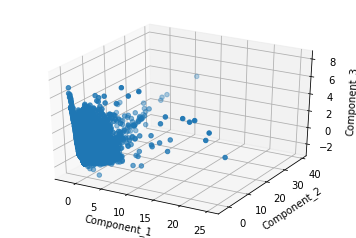

In [10]:
from mpl_toolkits.mplot3d import Axes3D

#生成三维图形，每个样本点的坐标分别是三个主成分的值
fig_reduced_data = plt.figure()
ax_reduced_data = plt.subplot(111,projection = '3d')
ax_reduced_data.scatter(X_pca_frame.pca_1.values,X_pca_frame.pca_2.values,
                        X_pca_frame.pca_3.values)
ax_reduced_data.set_xlabel('Component_1')
ax_reduced_data.set_ylabel('Component_2')
ax_reduced_data.set_zlabel('Component_3')

#### 聚类算法之后的不同簇数据的可视化：

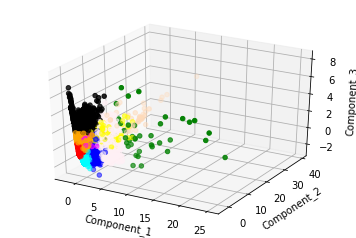

In [11]:
#设置每个簇对应的颜色
cluster_2_color = {0:'red',1:'green',2:'blue',3:'yellow',4:'cyan',
                  5:'black',6:'magenta',7:'#fff0f5',8:'#ffdab9',9:'#ffa500'}

colors_clustered_data = X_pca_frame.cluster.map(cluster_2_color)
fig_clustered_data = plt.figure()
ax_clustered_data = plt.subplot(111,projection = '3d')

#聚类算法之后的不同簇数据的映射为不同颜色：
ax_clustered_data.scatter(X_pca_frame.pca_1.values,X_pca_frame.pca_2.values,
                          X_pca_frame.pca_3.values,c=colors_clustered_data)
ax_clustered_data.set_xlabel('Component_1')
ax_clustered_data.set_ylabel('Component_2')
ax_clustered_data.set_zlabel('Component_3')

### 3.筛选后的数据聚类可视化


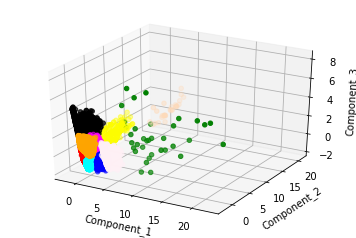

In [12]:
colors_filtered_data = result_data.cluster.map(cluster_2_color)
fig = plt.figure()
ax = plt.subplot(111,projection = '3d')
ax.scatter(result_data.pca_1.values,result_data.pca_2.values,
           result_data.pca_3.values,c=colors_filtered_data)
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')
ax.set_zlabel('Component_3')

In [13]:
### 4.每个聚类在pca_1,pca_2,pca_3上的均值的可视化 

### step 6. 用户行为分析（用户画像构建）

In [14]:
#查看各族中的每月话费情况
monthly_Fare = result_data.groupby('cluster').describe().loc[:,u'每月话费']
monthly_Fare

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,9521.0,23.237534,34.969752,-0.001667,0.000000,4.000000,41.486667,176.666667
1,35.0,1084.449095,438.895382,526.775000,666.710000,980.900000,1561.366667,1795.206667
2,2179.0,309.775277,135.119574,0.000000,289.923333,390.000000,392.000000,589.000000
3,297.0,101.299590,42.357029,40.000000,89.000000,89.000000,129.000000,406.333333
4,2807.0,2.803202,15.826418,0.000000,0.000000,0.000000,0.000000,200.045000
5,1249.0,70.341157,87.760762,0.000000,4.200000,21.450000,116.733333,687.673333
6,1606.0,79.084526,21.819183,0.000000,60.000000,89.000000,90.000000,240.000000
7,1529.0,396.255112,46.607964,10.948333,390.000000,396.093333,408.000000,620.083333
8,30.0,403.396111,35.766471,389.000000,389.000000,391.000000,394.750000,532.000000


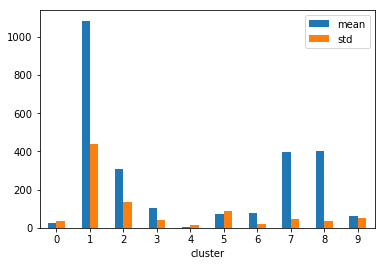

In [15]:
monthly_Fare[['mean','std']].plot(kind ='bar',rot = 0,legend = True)

In [16]:
#查看各族中的入网时间情况
access_time = result_data.groupby('cluster').describe().loc[:,u'入网时间']
access_time

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,9521.0,28.318769,11.871898,12.0,17.00,26.0,39.0,57.0
1,35.0,42.257143,30.070841,16.0,27.50,28.0,51.5,132.0
2,2179.0,24.415787,7.619850,12.0,20.00,25.0,28.0,81.0
3,297.0,22.468013,7.817156,12.0,16.00,22.0,23.0,60.0
4,2807.0,18.831849,5.484594,12.0,15.00,16.0,25.0,42.0
5,1249.0,118.686950,28.960165,29.0,102.00,122.0,135.0,193.0
6,1606.0,27.220423,8.906785,12.0,21.00,25.0,38.0,72.0
7,1529.0,25.612819,8.870461,12.0,20.00,27.0,28.0,93.0
8,30.0,25.433333,14.163292,12.0,17.25,20.5,27.0,65.0


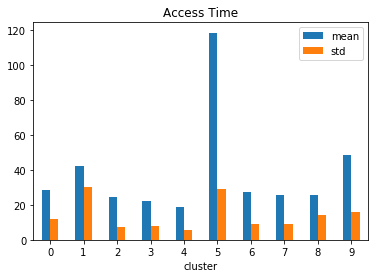

In [17]:
access_time[['mean','std']].plot(kind ='bar',rot = 0,
                                 legend = True,title ='Access Time')

In [63]:
#查看各族中的欠费金额情况
arrearage = result_data.groupby('cluster').describe().loc[:,u'欠费金额']


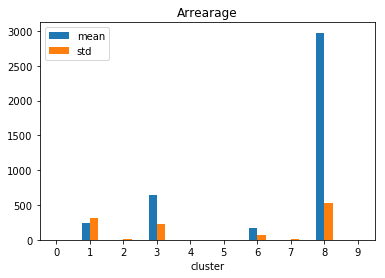

In [64]:
arrearage[['mean','std']].plot(kind ='bar',rot = 0,
                                 legend = True,title ='Arrearage')

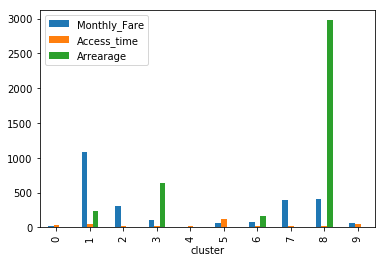

In [65]:
#综合描述
new_column = [ 'Access_time',u'套餐价格',u'每月流量','Monthly_Fare',u'每月通话时长',
              'Arrearage',u'欠费月份数',u'pca_1', u'pca_2', u'pca_3', u'cluster']
result_data.columns = new_column
result_data.groupby('cluster')[['Monthly_Fare','Access_time','Arrearage']]\
.mean().plot(kind = 'bar')